In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.vision import *
np.random.seed(42  )

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
IMAGES_PATH = path/'images'

In [6]:
IMAGES_PATH.ls()[:10]

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/saint_bernard_188.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_114.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Persian_144.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Maine_Coon_268.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/newfoundland_95.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/pug_161.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_175.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/basset_hound_125.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_133.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/keeshond_114.jpg')]

In [7]:
size = 224
bs = 64 

In [8]:
regex = re.compile('.*/(.*?)_\d+')
regex.match(str(IMAGES_PATH.ls()[0])).groups()

('saint_bernard',)

In [9]:
src = ImageList.from_folder(IMAGES_PATH)
src = src.split_by_rand_pct()
src = src.label_from_re(regex)
src = src.transform(get_transforms(), size=size)
data = src.databunch(bs=bs)
data = data.normalize(imagenet_stats)

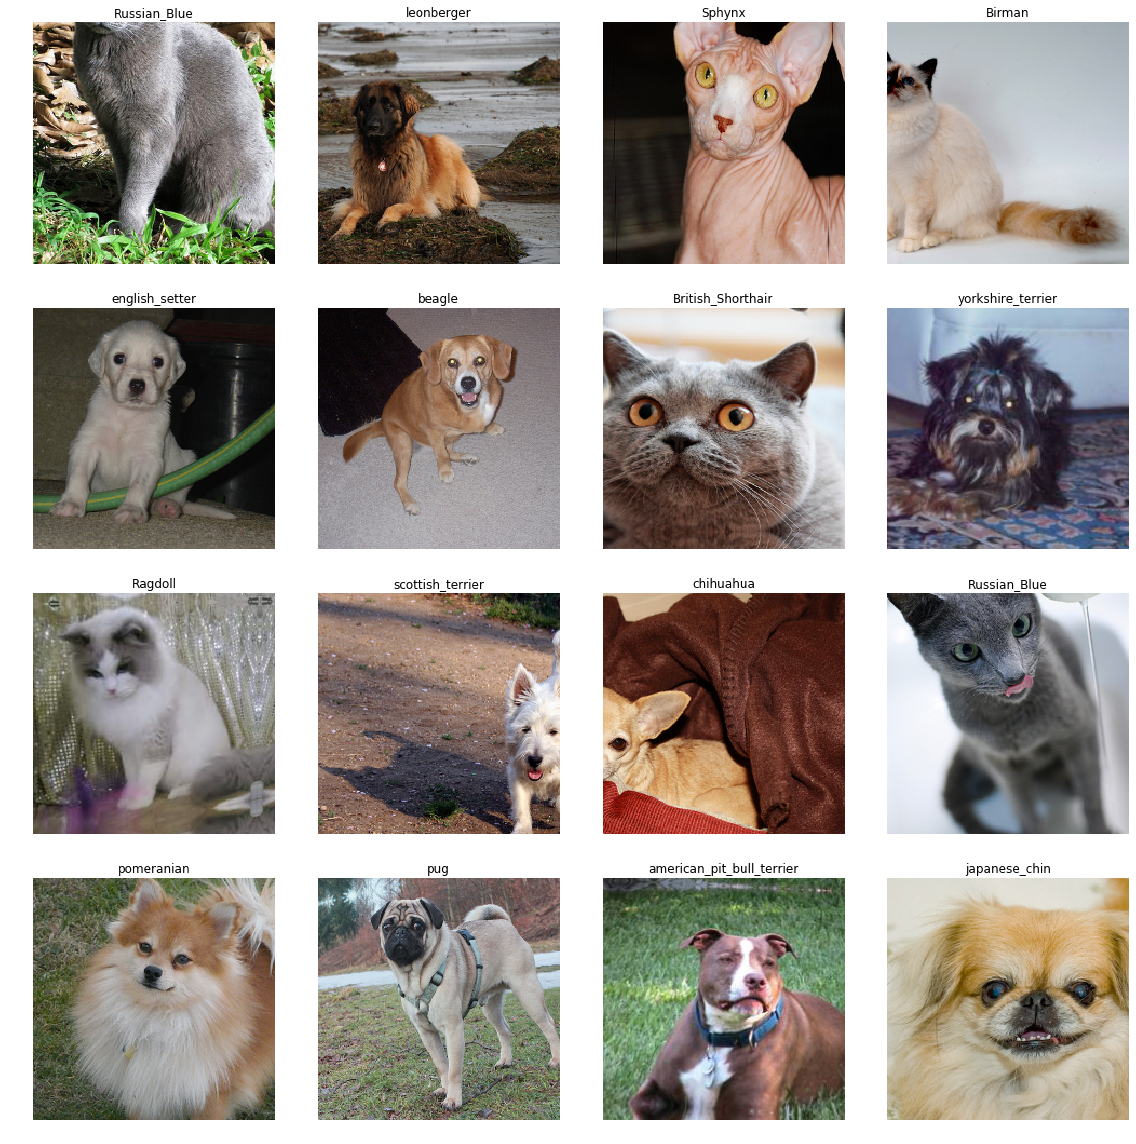

In [14]:
data.show_batch()

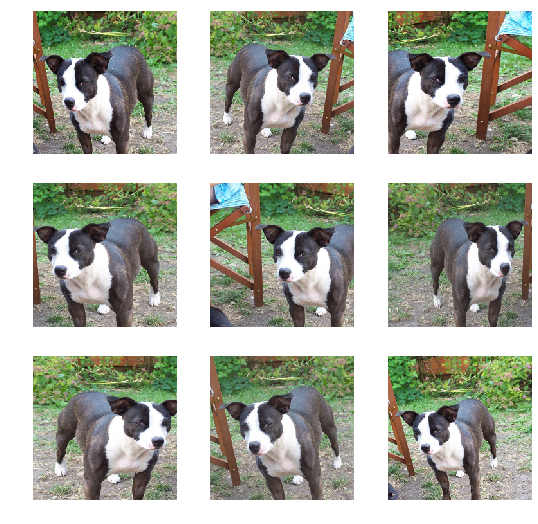

In [15]:
show_multi(lambda x, y: data.train_ds[1][0], 3, 3)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


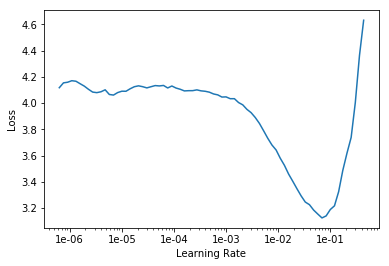

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(1, 1e-2)

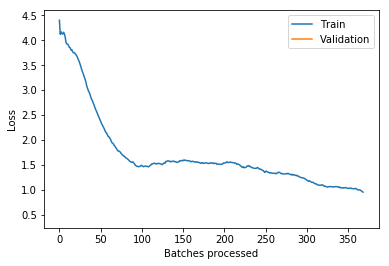

In [24]:
learn.recorder.plot_losses()

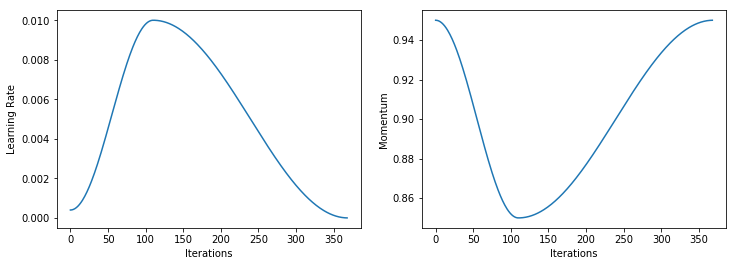

In [28]:
learn.recorder.plot_lr(show_moms=True)

In [ ]:
learn.save('s1')

In [11]:
learn.load('s1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,Maine_Coon,pug,english_cocker_spaniel,basset_hound
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,newfoundland,chihuahua,japanese_chin,British_Shorthair
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kern

In [12]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


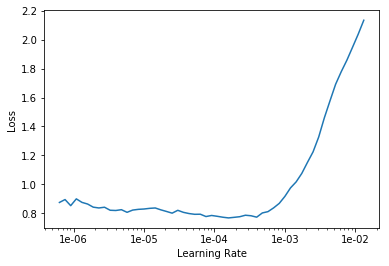

In [34]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(8, slice(1e-5, 1e-3))

In [15]:
learn.save("s2")

In [16]:
learn.load("s2")

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,Maine_Coon,pug,english_cocker_spaniel,basset_hound
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,newfoundland,chihuahua,japanese_chin,British_Shorthair
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kern

# fixes

In [31]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


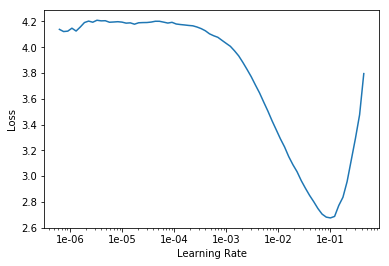

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1, 1e-2)

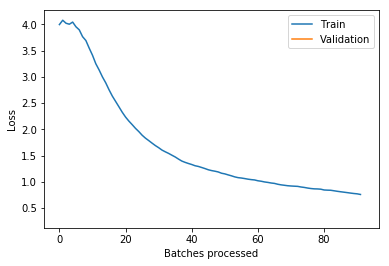

In [35]:
learn.recorder.plot_losses()

In [36]:
learn.save("fix_s1")

In [42]:
learn.load("fix_s1")

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,Maine_Coon,pug,english_cocker_spaniel,basset_hound
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,newfoundland,chihuahua,japanese_chin,British_Shorthair
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kern

In [43]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


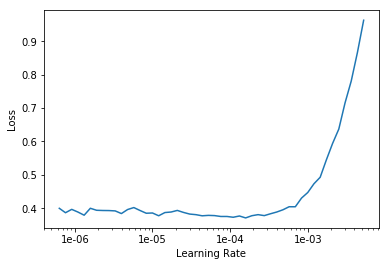

In [40]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(2, slice(1e-6, 1e-4))

# resnet 50

In [10]:
size = 299
bs = 32

In [11]:
src = ImageList.from_folder(IMAGES_PATH)
src = src.split_by_rand_pct()
src = src.label_from_re(regex)
src = src.transform(get_transforms(), size=size)
data = src.databunch(bs=bs)
data = data.normalize(imagenet_stats)

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


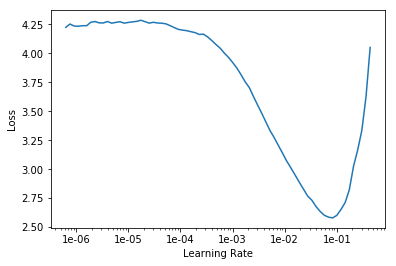

In [53]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(8, 1e-2)

In [63]:
learn.save('resnet50-s1')

In [13]:
learn.load('resnet50-s1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
saint_bernard,Persian,english_cocker_spaniel,basset_hound,keeshond
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
scottish_terrier,scottish_terrier,beagle,samoyed,beagle
Path: /home/ubuntu/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_s

In [62]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


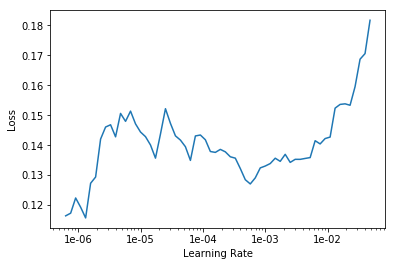

In [65]:
learn.recorder.plot()

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(2, slice(1e-6, 1e-4))

In [16]:
learn.save('resnet50-s2')

In [17]:
it = learn.interpret()

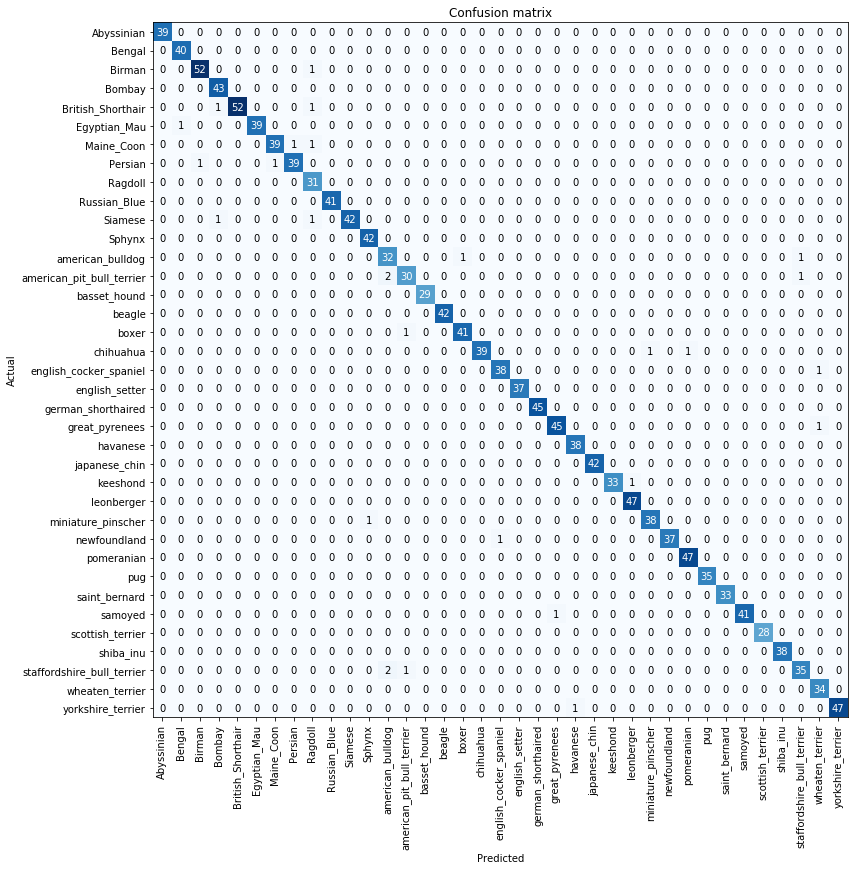

In [33]:
it.plot_confusion_matrix(figsize=(12, 12))

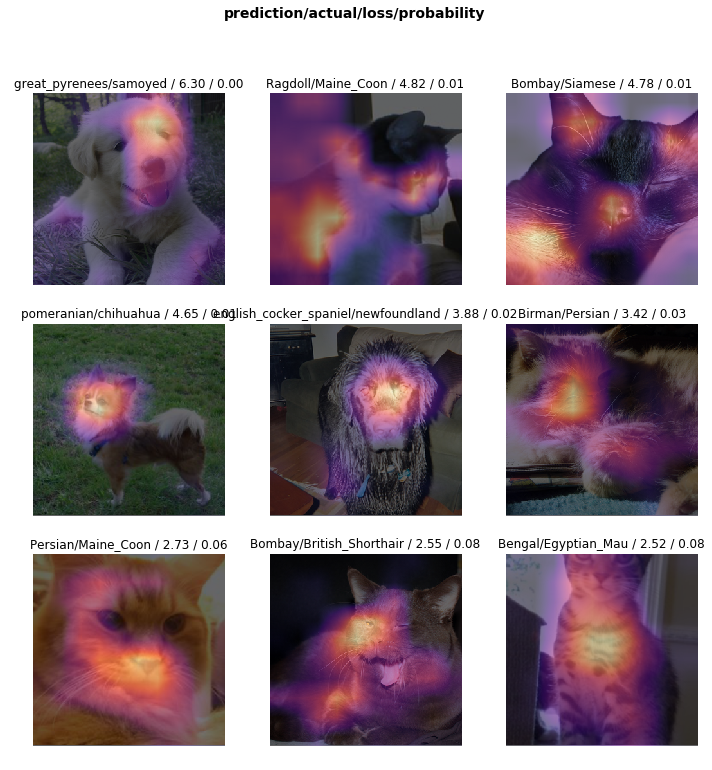

In [20]:
it.plot_top_losses(9)

In [29]:
(it.pred_class.numpy() == it.y_true.numpy()).mean()

0.9810554803788903

In [30]:
it_tta = learn.interpret(tta=True)

In [32]:
(it_tta.pred_class.numpy() == it_tta.y_true.numpy()).mean()

0.9817320703653586